In [9]:
### Comparison of EWK signal versus QCD background for ZZjj ###

#%pylab inline
%matplotlib inline
from array import array
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from root_numpy.tmva import add_classification_events, evaluate_reader
from ROOT import TMVA, TFile, TCut

from root_numpy import root2array, rec2array

from IPython.core.pylabtools import figsize

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

tree_prefix = '/home/llr/cms/pigard/ZZjj_generator_study/'

classic_vbf = ['m_jj', 
                'dEta_tj', 
                'm_4l',
                'Z1_zepp', 
                'Z2_zepp', 
                'dPhi_Z1_Z2', 
                'tj1_eta_x_tj2_eta']
prod_angles = [
                'vbf_costhetastar',
                'vbf_costheta1',
                'vbf_costheta2',
                'vbf_phi',
                'vbf_phi1',
                'qv1',
                'qv2',]

decay_angles = ['costhetastar', 
                'phi', 
                'costheta1', 
                'costheta2', 
                'phi1',
    
]

hadronic_activity = [  'ntj_n',
                'ntj_scalar_sum_pt',
                'ntj_central_n',
                'ntj_central_scalar_sum_pt']

new_var = [     'max_4l_eta',
                'tj_min_eta',
                'tj_max_eta',
                'rel_pt_hard',
                'tj_delta_rel',
                'tj_sum_abs_eta',
                'tj2_eta',
                'tj1_eta',
                'tj2_pt', #is actually Z2
                'tj1_pt',#is actually Z1
                'm_jj_over_dEta_tj'
          ]


qg = ['tj1_qg', 'tj2_qg']

prune_1 = classic_vbf + new_var + hadronic_activity + qg
prune_1_remove = ['tj1_eta_x_tj2_eta', 'max_4l_eta', 'tj_sum_abs_eta', 'tj_min_eta', 
                  'dPhi_Z1_Z2', 'tj2_eta', 'm_jj_over_dEta_tj', 'tj_max_eta','tj2_pt']
prune_1 = [var for var in prune_1 if var not in prune_1_remove]

print prune_1

minimal = [ 'm_jj', 
            'dEta_tj', 
            'm_4l',
            'Z1_zepp',
            'Z2_zepp',
           'rel_pt_hard',
           'tj_delta_rel'
      ]

branch_names = prune_1


['m_jj', 'dEta_tj', 'm_4l', 'Z1_zepp', 'Z2_zepp', 'rel_pt_hard', 'tj_delta_rel', 'tj1_eta', 'tj1_pt', 'ntj_n', 'ntj_scalar_sum_pt', 'ntj_central_n', 'ntj_central_scalar_sum_pt', 'tj1_qg', 'tj2_qg']


In [10]:
signal = root2array(tree_prefix + 'zzjj_ewk_tight_v7_ZZ4lAnalysis_MVA_tree.root',
                    "test",
                    branch_names)#, stop = 50000)


backgr = root2array(tree_prefix + 'zzjj_qcd_tight_v7_ZZ4lAnalysis_MVA_tree.root',
                    "test",
                    branch_names)#, stop = 20000)

# Variables used in minimal BDT

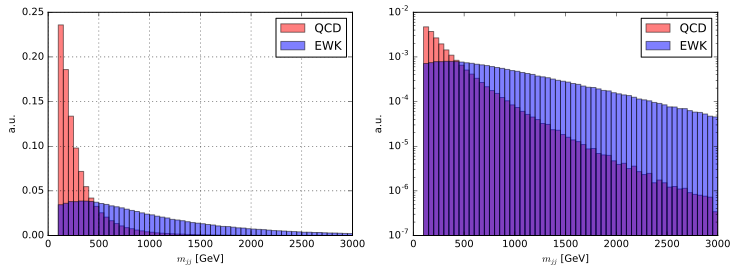

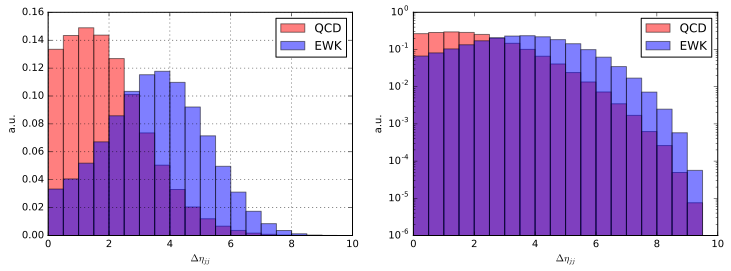

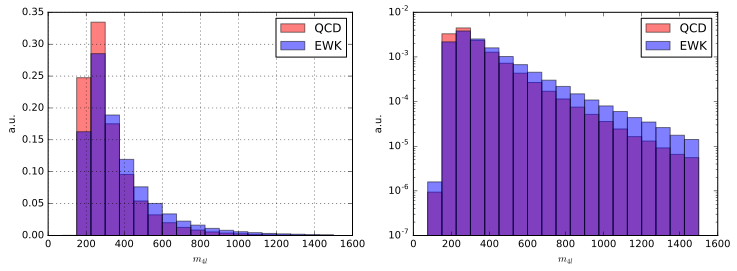

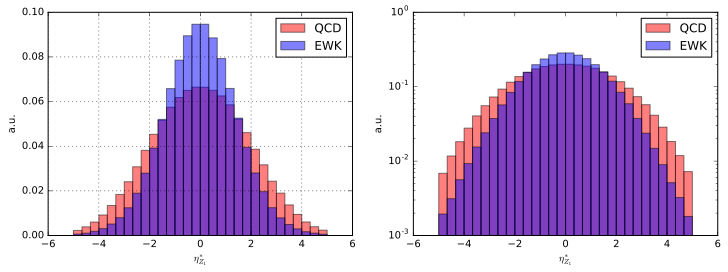

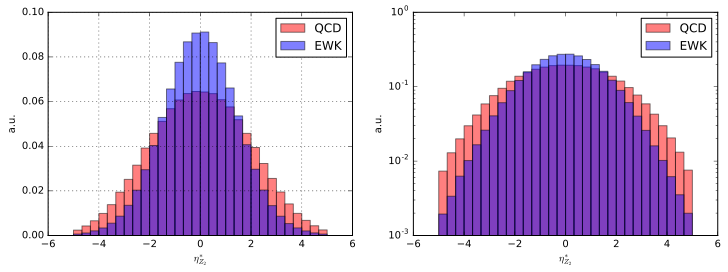

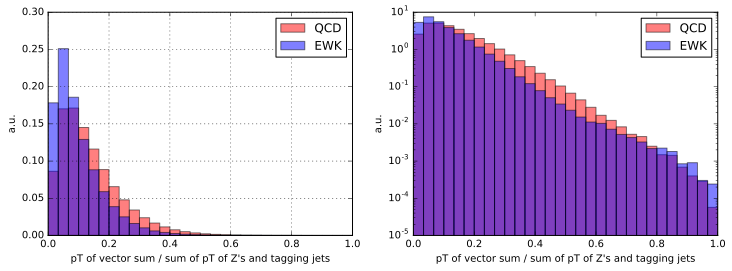

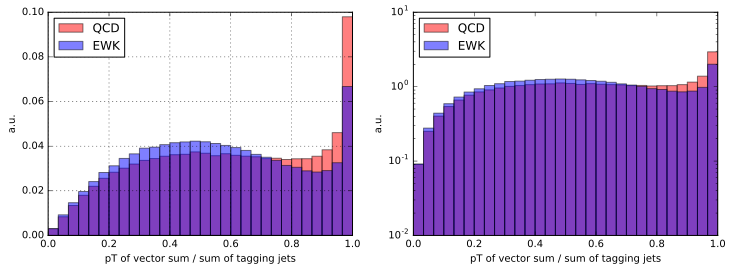

In [11]:
plot_BDT_variables(minimal)

# Variabes used in pruned tree

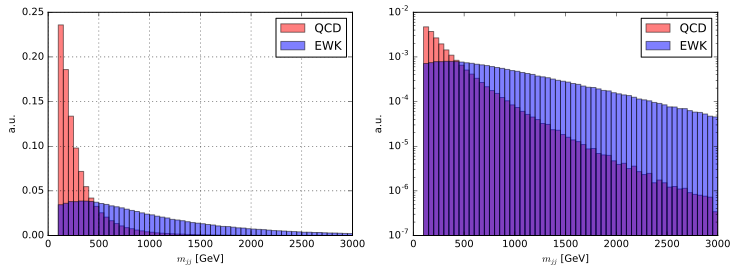

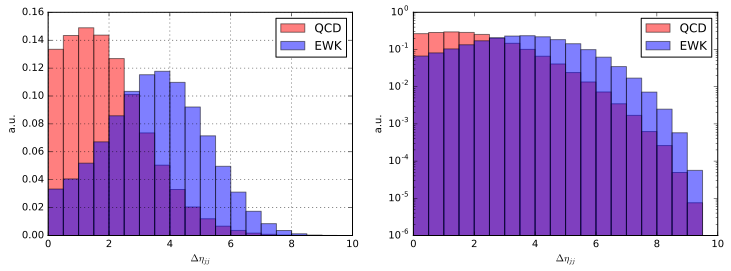

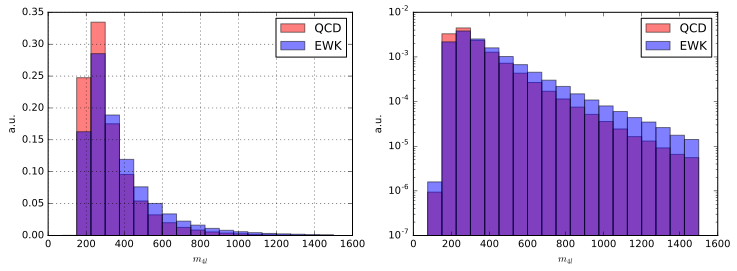

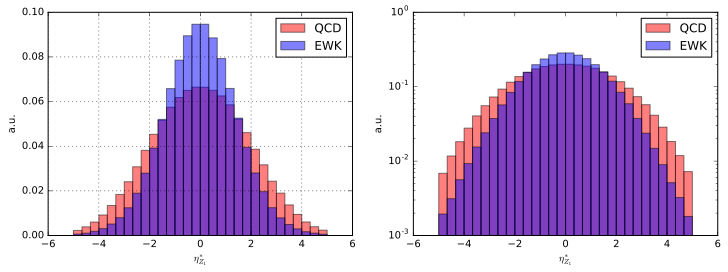

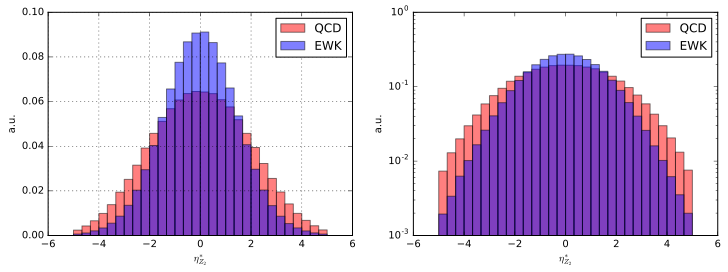

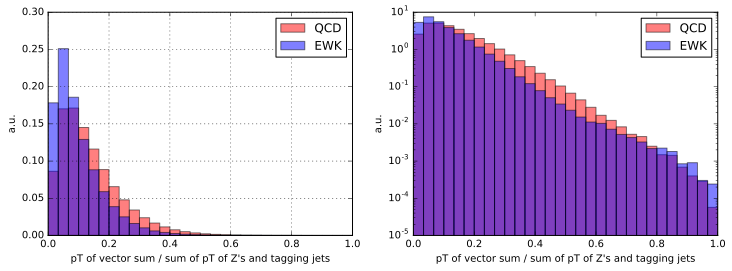

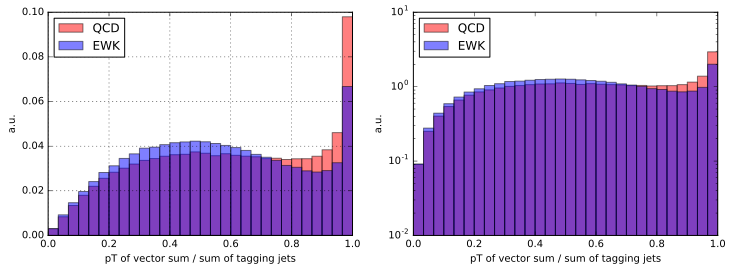

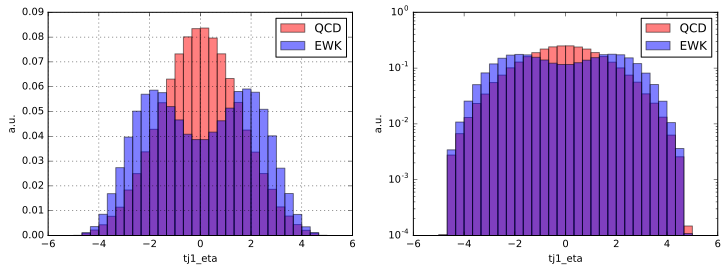

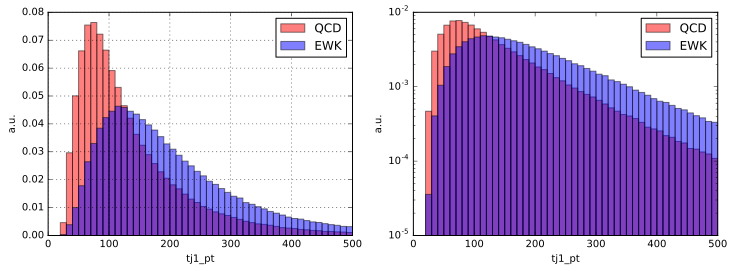

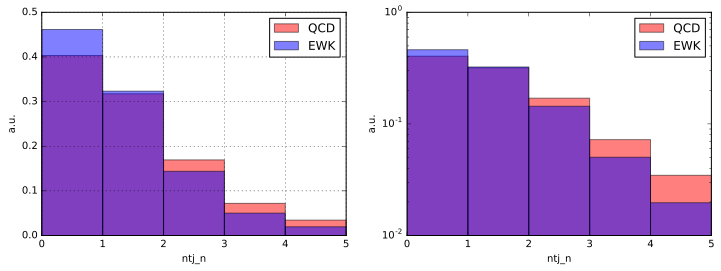

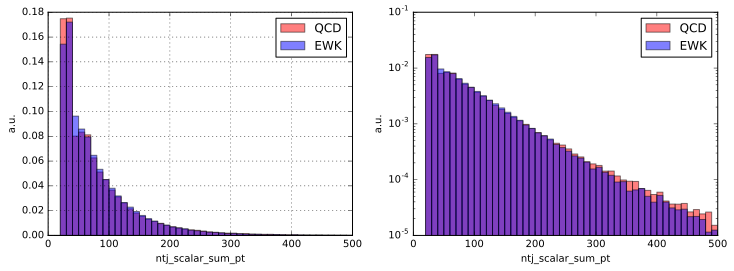

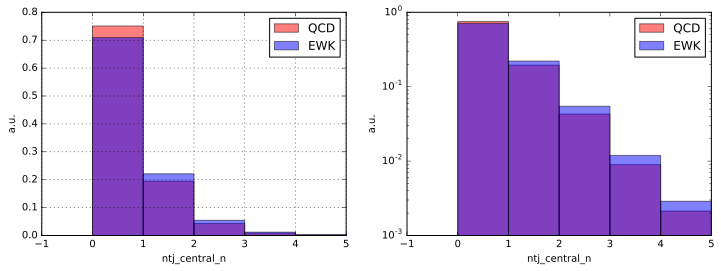

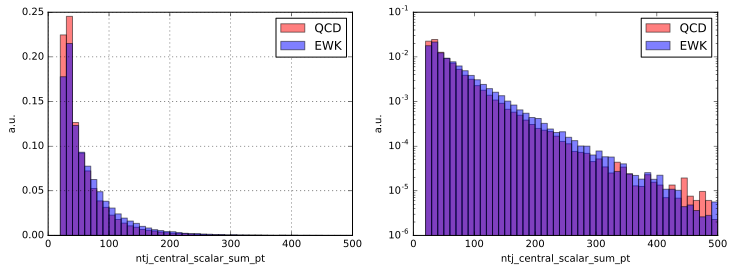

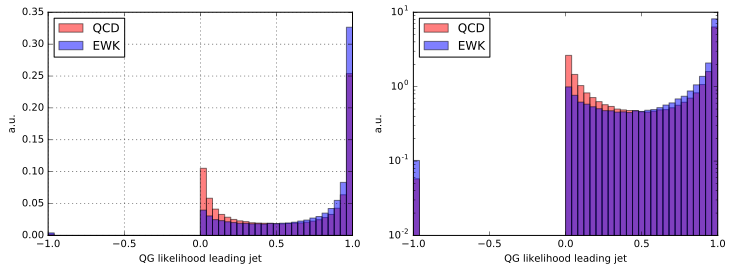

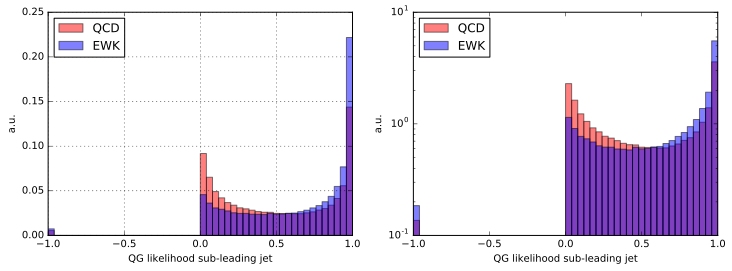

In [12]:
plot_BDT_variables(prune_1)

In [5]:
#'costhetastar', 'Phi', 'costheta1', 'costheta2', 'Phi1'
plots = {'m_jj' :(r'$m_{jj}$ [GeV]', 60 , [0, 3000]),
         'dEta_tj' :(r'$\Delta\eta_{jj}$', 20, [0, 10]),
         'm_4l' : (r'$m_{4l}$', 20, [0, 1500]),
         'Z1_zepp' : (r'$\eta^{*}_{Z_{1}}$', 30, [-5, 5]),
         'Z2_zepp' : (r'$\eta^{*}_{Z_{2}}$', 30, [-5, 5]),
         'rel_pt_hard' : ("pT of vector sum / sum of pT of Z's and tagging jets", 30, [0, 1]),
         'tj_delta_rel' : ("pT of vector sum / sum of tagging jets", 30, [0, 1]),
         'tj1_eta' : ('tj1_eta', 30, [-5, 5]),
         'tj1_pt' : ('tj1_pt', 50, [0, 500]),
         'ntj_n' : ('ntj_n', 5, [0, 5]),
         'ntj_scalar_sum_pt' : ('ntj_scalar_sum_pt', 50, [0, 500]),
         'ntj_central_n' : ('ntj_central_n', 6, [-1, 5]),
         'ntj_central_scalar_sum_pt' : ('ntj_central_scalar_sum_pt', 50, [0, 500]),
         'tj1_qg' : ('QG likelihood leading jet', 50, [-1, 1]),
         'tj2_qg' :('QG likelihood sub-leading jet', 50, [-1, 1]),
         
         }

""""
         (r'$\Delta\phi(Z_{1}, Z_{2})$', 100, [-5,5]),
         (r'$\eta_{j_{1}}\times\eta_{j_{2}}$', 20, [-10, 10]),
         (r'$\cos{\theta^*}$', 22, [-1.1, 1.1]),
         (r'$\Phi$', 20, [-3.3, 3.3]),
         (r'$\cos \theta_1$', 22, [-1.1, 1.1]),
         (r'$\cos \theta_2$', 22, [-1.1, 1.1]),
         (r'$\Phi_1$', 20, [-3.3, 3.3]),
         (r'$VBF \cos{\theta^*}$', 22, [-1.1, 1.1]),
         (r'$VBF \cos \theta_1$', 22, [-1.1, 1.1]),
         (r'$VBF \cos \theta_2$', 22, [-1.1, 1.1]),
         (r'$VBF \Phi$', 20, [-3.3, 3.3]),
         (r'$VBF \Phi_1$', 20, [-3.3, 3.3]),
         (r'$q_{V1}$ [GeV]', 30 , [0, 3000]),
         (r'$q_{V2}$ [GeV]', 30 , [0, 3000]), 
         (r'$\Delta\phi(j_{1}, j_{2})$', 60, [-1,5]),
                  (r'$tj1 qg$', 60, [-1,1]),
                  (r'$tj2 qg$', 60, [-1,1]),
                  (r'$n_{jets}$', 60, [-1,7]),
                           (r'$sum pt$', 60, [0,300]),
                           (r'$central jets$', 60, [-1,7]),
                           (r'$central sum pt$', 60, [0,300]),
        ]
"""
#fig = plt.figure()




#plt.subplots(2, 3)

def plot_BDT_variables(variables) :
    figsize(12, 4)
    for plot in variables :
        p = plots[plot]
        weights_s = np.ones_like(signal[plot])/float(len(signal[plot]))
        weights_b = np.ones_like(backgr[plot])/float(len(backgr[plot]))
        plt.subplot(121)
        plt.hist(backgr[plot], bins=p[1], range=p[2], weights=weights_b, lw=1, alpha=0.5, color = 'red', label='QCD')
        plt.hist(signal[plot], bins=p[1], range=p[2], weights=weights_s, lw=1, alpha=0.5, label='EWK')
    #plt.locator_params(nbins=10)
    #plt.locator_params(axis='y',nbins=20)
    #plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
    #plt.xlim([-0.0, 0.45])
    #plt.ylim([-0.05, 1.05])
        plt.xlabel(p[0])
        plt.ylabel('a.u.')
        #plt.title('Receiver operating characteristic')
        plt.legend(loc="best")
        #plt.legend().set_visible(False)
        #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        #       ncol=2, mode="expand", borderaxespad=0.)
        #plt.legend(numpoints=1)
        plt.grid()

        plt.subplot(122)
        plt.hist(backgr[plot], bins=p[1], range=p[2], normed=1, lw=1, alpha=0.5, color = 'red', label='QCD')
        plt.hist(signal[plot], bins=p[1], range=p[2], normed=1, lw=1, alpha=0.5, label='EWK')
    #plt.locator_params(nbins=10)
    #plt.locator_params(axis='y',nbins=20)
    #plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
    #plt.xlim([-0.0, 0.45])
    #plt.ylim([-0.05, 1.05])
        plt.xlabel(p[0])
        plt.ylabel('a.u.')
        #plt.title('Receiver operating characteristic')
        plt.legend(loc="best")
        plt.yscale('log', nonposy='clip')

        plt.show()

/Users/pigard/Envs/default_venv/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


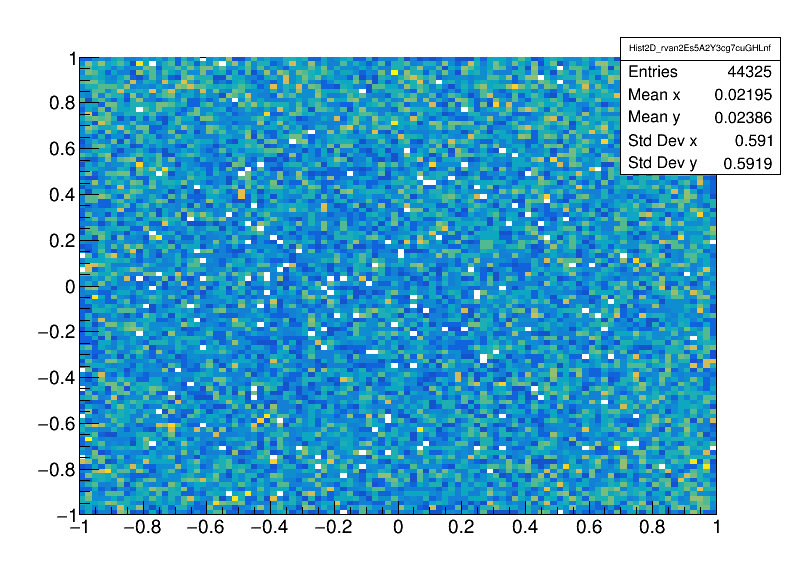

In [2]:
from rootpy.plotting import Hist2D
from ROOT import TCanvas

c = TCanvas("myCanvasName","The Canvas Title",800,600)

theta1_theta2 = Hist2D(100, -1, 1, 100, -1, 1)

slice_theta = signal[:, [9,10]]

#print slice_theta

theta1_theta2.fill_array(slice_theta)

theta1_theta2.Draw("COL")
c.Draw()






signal


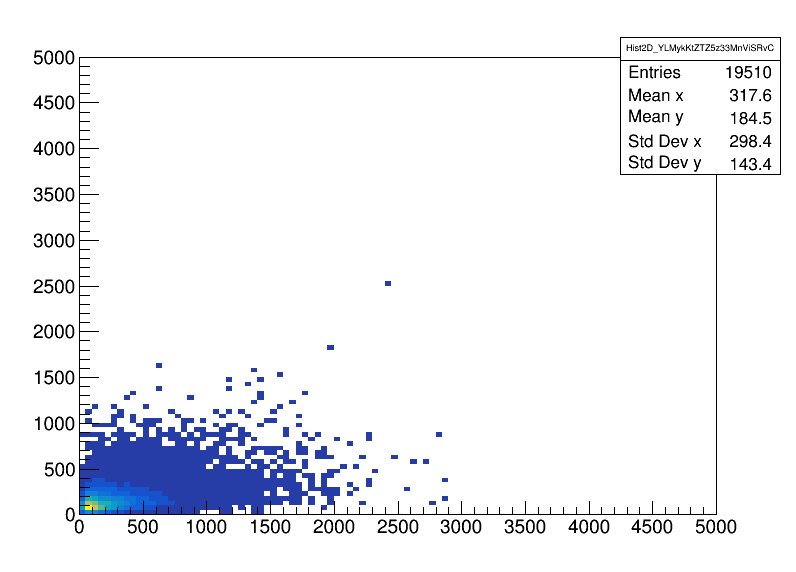

In [3]:
from rootpy.plotting import Hist2D
from ROOT import TCanvas

c = TCanvas("myCanvasName","The Canvas Title",800,600)

theta1_theta2 = Hist2D(100, 0, 5000, 100, 0, 5000)


slice_q = backgr[:, [-1,-2]]

#print slice_theta

theta1_theta2.fill_array(slice_q)

theta1_theta2.Draw("COL")
print 'signal'
c.Draw()



background


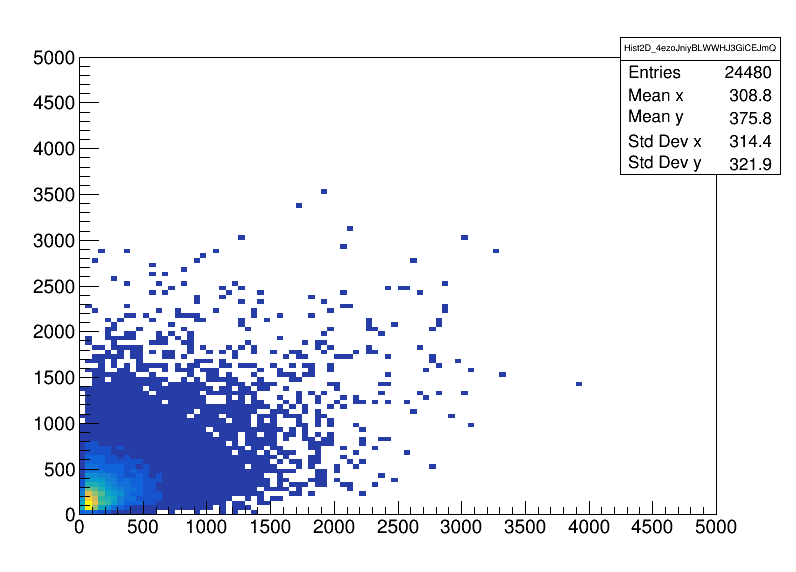

In [21]:
from rootpy.plotting import Hist2D
from ROOT import TCanvas

c = TCanvas("myCanvasName","The Canvas Title",800,600)

theta1_theta2 = Hist2D(100, 0, 5000, 100, 0, 5000)


slice_q = backgr[:, [-1,-2]]

#print slice_theta

theta1_theta2.fill_array(slice_q)

theta1_theta2.Draw("COL")
print 'background'
c.Draw()

